# Final Features extracted 


- label: This feature indicates whether the file is labeled as benign (False) or malicious (True).
- .textsize: This feature represents the size of the .text section in the PE file.
- .textentropy: This feature represents the entropy of the .text section in the PE file.
- .textvsize: This feature represents the virtual size of the .text section in the PE file.
- .datasize: This feature represents the size of the .data section in the PE file.
- .dataentropy: This feature represents the entropy of the .data section in the PE file.
- .datavsize: This feature represents the virtual size of the .data section in the PE file.
- .rsrcsize: This feature represents the size of the .rsrc section in the PE file.
- .rsrcentropy: This feature represents the entropy of the .rsrc section in the PE file.
- .rsrcvsize: This feature represents the virtual size of the .rsrc section in the PE file.
- machine: This feature represents the type of machine for which the file is intended.
- subsystem: This feature represents the target subsystem for the PE file.
- generalsize: This feature represents the size of the general file information in the PE header.
- generalvsize: This feature represents the virtual size of the general file information in the PE header.
- generalhas_debug: This feature indicates whether the PE file has a debug section (True) or not (False).
- generalexports: This feature represents the number of exported functions in the PE file.
- generalimports: This feature represents the number of imported functions in the PE file.
- generalhas_relocations: This feature indicates whether the PE file has relocation information (True) or not (False).
- generalhas_resources: This feature indicates whether the PE file has resource information (True) or not (False).
- generalhas_signature: This feature indicates whether the PE file has a digital signature (True) or not (False).
- generalhas_tls: This feature indicates whether the PE file has thread local storage (TLS) information (True) or not (False).
- generalsymbols: This feature represents the number of symbols in the PE file.
- stringsnumstrings: This feature represents the number of printable strings in the PE file.
- stringsavlength: This feature represents the average length of the printable strings in the PE file.
- stringsprintabledist: This feature represents the histogram of printable characters within the printable strings.
- stringsprintables: This feature indicates whether the PE file contains printable strings (True) or not (False).
- stringsentropy: This feature represents the entropy of characters across all printable strings.
- stringspaths: This feature represents the number of strings that begin with "C:\" indicating paths.
- stringsurls: This feature represents the number of strings that contain "http://" or "https://" indicating URLs.
- stringsregistry: This feature represents the number of strings that contain "HKEY_" indicating registry keys.
- stringsMZ: This feature represents the number of strings that contain "MZ" indicating Windows PE droppers or bundled executables.
- cofftimestamp: This feature represents the timestamp in the COFF header of the PE file.
- coffmachine: This feature represents the target machine for which the PE file is intended.
- coffcharacteristics: This feature represents a list of image characteristics of the PE file.
- optionalsubsystem: This feature represents the target subsystem specified in the optional header of the PE file.
- optionaldll_characteristics: This feature represents a list of DLL characteristics of the PE file.
- optionalmagic: This feature represents the magic value in the optional header of the PE file.
- optionalmajor_image_version: This feature represents the major image version specified in the optional header of the PE file.
- optionalminor_image_version: This feature represents the minor image version specified in the optional header of the PE file.
- optionalmajor_linker_version: This feature represents the major linker version specified in the optional header of the PE file.
- optionalminor_linker_version: This feature represents the minor linker version specified in the optional header of the PE file.
- optionalmajor_operating_system_version: This feature represents the major operating system version specified in the optional header of the PE file.
- optionalminor_operating_system_version: This feature represents the minor operating system version specified in the optional header of the PE file.
- optionalmajor_subsystem_version: This feature represents the major subsystem version specified in the optional header of the PE file.
- optionalminor_subsystem_version: This feature represents the minor subsystem version specified in the optional header of the PE file.
- optionalsizeof_code: This feature represents the size of the code section specified in the optional header of the PE file.
- optionalsizeof_headers: This feature represents the size of the headers specified in the optional header of the PE file.
- optionalsizeof_heap_commit: This feature represents the size of the committed heap specified in the optional header of the PE file.


# Dependencies

In [10]:
# %pip install scikit-learn 
# %pip install matplotlib
# %pip install scipy 
# %pip install keras 
# %pip install seaborn
# %pip install tensorflow
# %pip install scikeras



# Library Imports 


In [1]:
# import all the required libraries in this place

import json
import csv
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split, learning_curve, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import xgboost as xgb
from scipy.stats import randint

import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import regularizers
from keras import backend as K



from scikeras.wrappers import KerasClassifier







2023-08-29 06:54:28.104063: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 06:54:28.105769: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 06:54:28.142552: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-29 06:54:28.143567: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 06:54:28.858848: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# Loading and Pruning Dataset


In [2]:
#Function to load data set
def load_dataset_from_jsonl(file_path, file_idx_start=0,file_idx_end=0,testing = False):
    dataset = []
    
    for i in range(file_idx_start,file_idx_end+1):
        path = file_path
        if not testing:
            path += '_' + str(i)
        path+= '.jsonl'
        with open(path, 'r') as file:
            for line in file:
                data = json.loads(line)
                dataset.append(data)
    return dataset

FILE_PATH_TRAINING = '../../dataset/ember2018/train_features'
FILE_PATH_TESTING = '../../dataset/ember2018/test_features'


dataset_training = load_dataset_from_jsonl(FILE_PATH_TRAINING,0,5)
dataset_testing = load_dataset_from_jsonl(FILE_PATH_TESTING,testing=True)




## Flattening the json objects


In [14]:

features= {}
features['label']=[]

def extract_features(feature, feature_name):
    global features
    
    for key, value in feature.items(): 
        
        string_name = feature_name + '' + key
        if string_name not in features:
            features[string_name]= []
        
        if isinstance(value, int) or isinstance(value, float):
            features[string_name].append(value)
        else:
            features[string_name].append(None)
    

section_names = ['.text', '.data', '.rsrc']
feature_names = ['size', 'entropy', 'vsize']

for section in section_names:
    for feature in feature_names:
        features[section + feature] = []

features['machine']=[]
features['subsystem']=[]


for data in dataset:
    
    if data['label'] == -1:
        continue

    #all sections should be equal to 1    
    section_count_list = {'.text':0, '.data':0, '.rsrc':0}
    for item in data['section']['sections']:
        
        if item['name'] in section_names:
            section_count_list[item['name']]+=1
    
    check = False
    for key,value in section_count_list.items():
        if value!=1:
            check=True
            break
    
    if check:
        continue
        
    feature_names = ['size', 'entropy', 'vsize']
        
    for item in data['section']['sections']:

        if item['name'] in section_names:
            
            for feature in feature_names:
                val = item[feature] if item[feature]!=None else None
                features[item['name'] + feature].append(val)
    
    feature_names = ['general', 'strings']

    for feature in feature_names:
        extract_features(data[feature], feature)

    for item in data['header']:
        extract_features(data['header'][item], item)
    
    features['machine'].append(data['header']['coff']['machine'])
    features['subsystem'].append(data['header']['optional']['subsystem'])
    
    
    features['label'].append(data['label'])

df = pd.DataFrame(features)
print(df['label'].value_counts())


label
0    21167
Name: count, dtype: int64


## Removing null columns

In [15]:
print(df.isnull().any())

label                                     False
.textsize                                 False
.textentropy                              False
.textvsize                                False
.datasize                                 False
.dataentropy                              False
.datavsize                                False
.rsrcsize                                 False
.rsrcentropy                              False
.rsrcvsize                                False
machine                                   False
subsystem                                 False
generalsize                               False
generalvsize                              False
generalhas_debug                          False
generalexports                            False
generalimports                            False
generalhas_relocations                    False
generalhas_resources                      False
generalhas_signature                      False
generalhas_tls                          

In [16]:
df.dropna(how='all', axis=1, inplace=True)

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21167 entries, 0 to 21166
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   label                                   21167 non-null  int64  
 1   .textsize                               21167 non-null  int64  
 2   .textentropy                            21167 non-null  float64
 3   .textvsize                              21167 non-null  int64  
 4   .datasize                               21167 non-null  int64  
 5   .dataentropy                            21167 non-null  float64
 6   .datavsize                              21167 non-null  int64  
 7   .rsrcsize                               21167 non-null  int64  
 8   .rsrcentropy                            21167 non-null  float64
 9   .rsrcvsize                              21167 non-null  int64  
 10  machine                                 21167 non-null  ob

## Encoding non integer columns

In [18]:

columns_to_encode = ['machine', 'subsystem']

for column in columns_to_encode:

    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21167 entries, 0 to 21166
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   label                                   21167 non-null  int64  
 1   .textsize                               21167 non-null  int64  
 2   .textentropy                            21167 non-null  float64
 3   .textvsize                              21167 non-null  int64  
 4   .datasize                               21167 non-null  int64  
 5   .dataentropy                            21167 non-null  float64
 6   .datavsize                              21167 non-null  int64  
 7   .rsrcsize                               21167 non-null  int64  
 8   .rsrcentropy                            21167 non-null  float64
 9   .rsrcvsize                              21167 non-null  int64  
 10  machine                                 21167 non-null  in

## Column distributions

In [19]:
print(df.var())

label                                     0.000000e+00
.textsize                                 5.780770e+12
.textentropy                              3.708292e-01
.textvsize                                5.861784e+12
.datasize                                 1.959326e+11
.dataentropy                              3.078977e+00
.datavsize                                5.310996e+13
.rsrcsize                                 7.510589e+13
.rsrcentropy                              2.280339e+00
.rsrcvsize                                6.258211e+13
machine                                   1.615638e+00
subsystem                                 8.923508e-01
generalsize                               9.197046e+13
generalvsize                              2.675454e+14
generalhas_debug                          2.454571e-01
generalexports                            8.262714e+05
generalimports                            1.150984e+05
generalhas_relocations                    2.224109e-01
generalhas

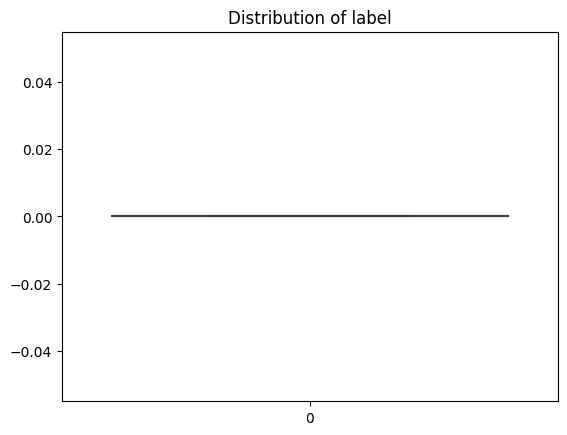

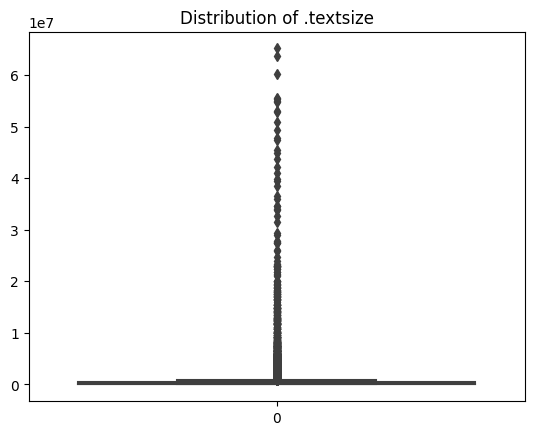

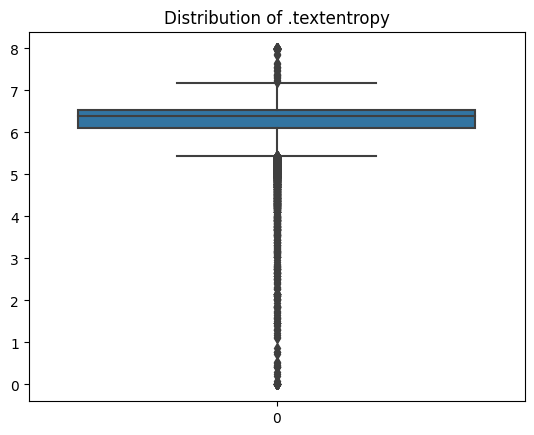

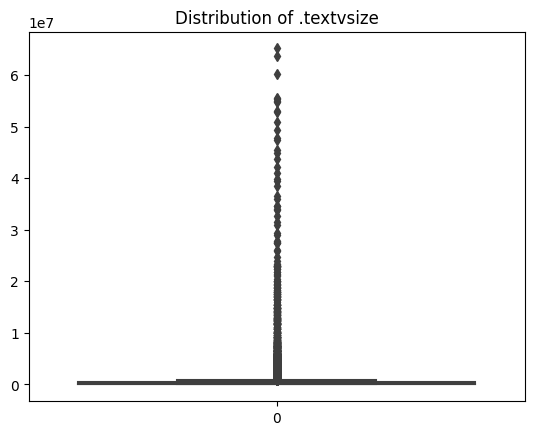

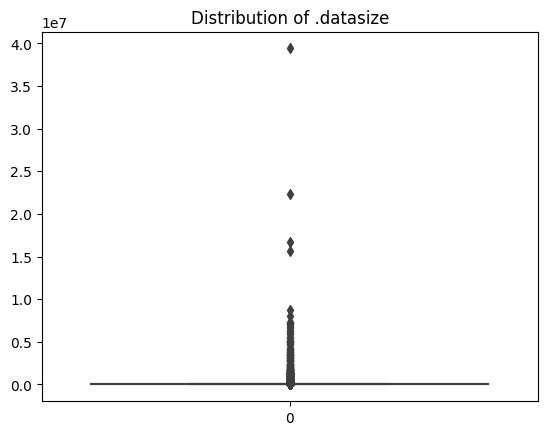

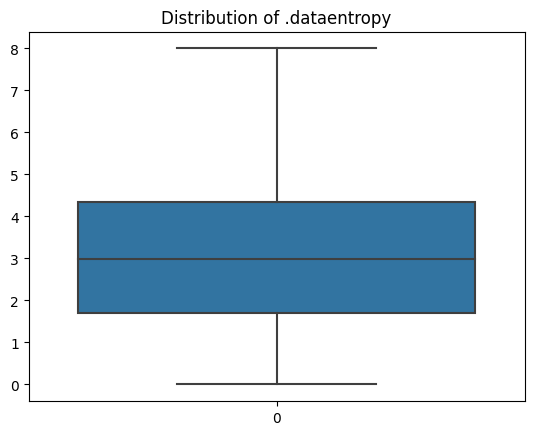

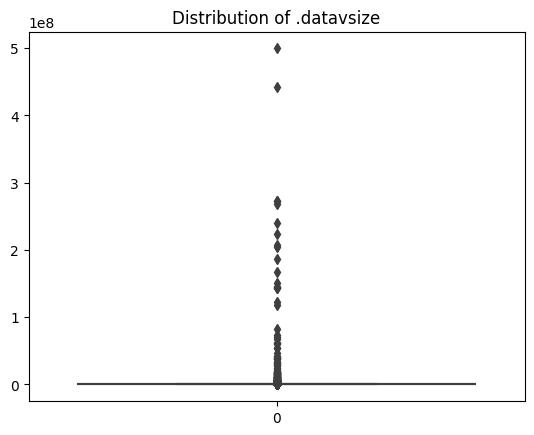

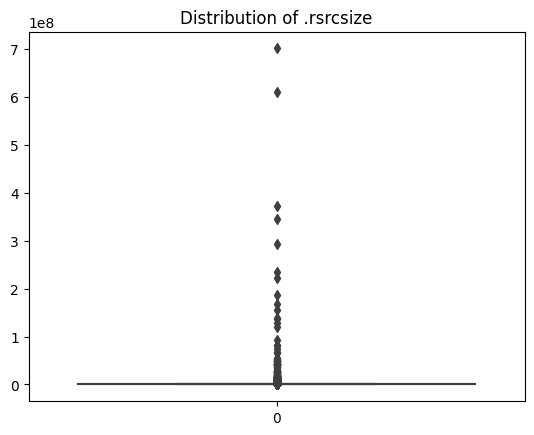

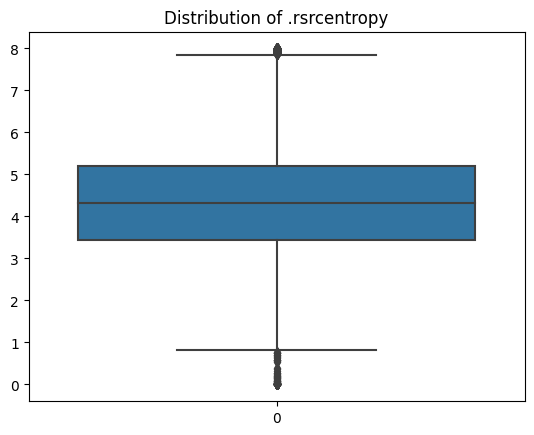

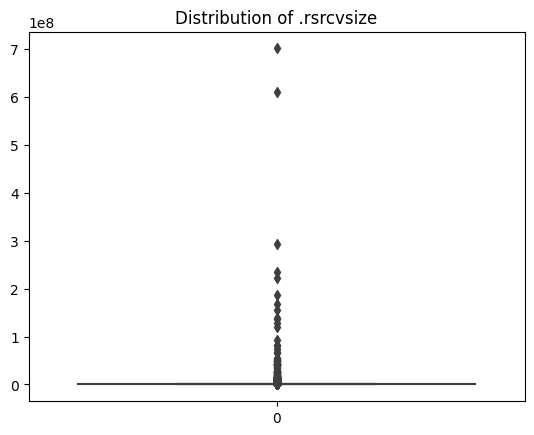

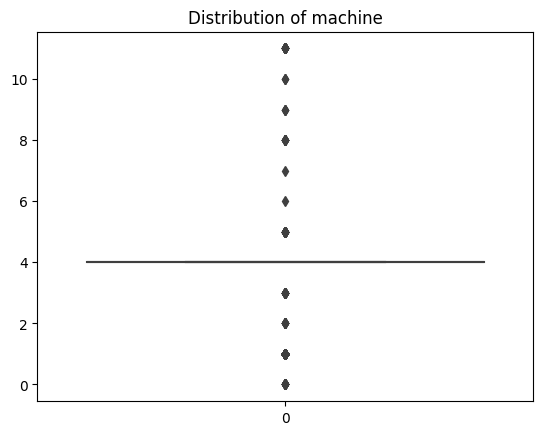

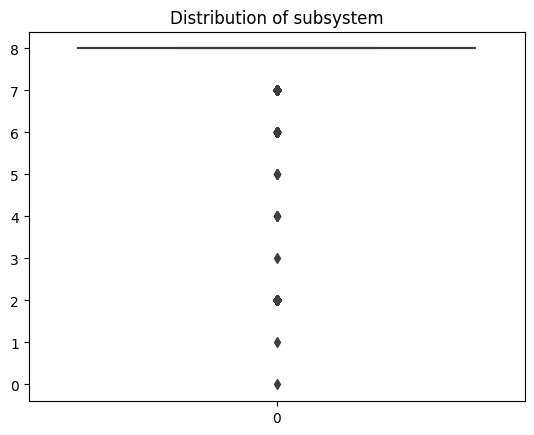

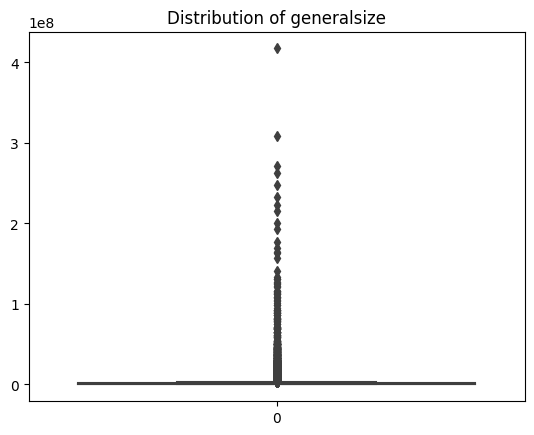

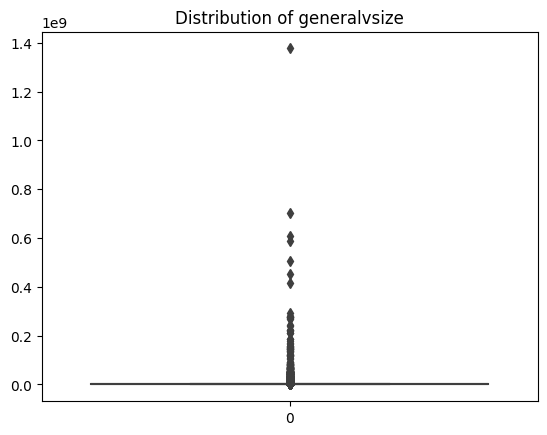

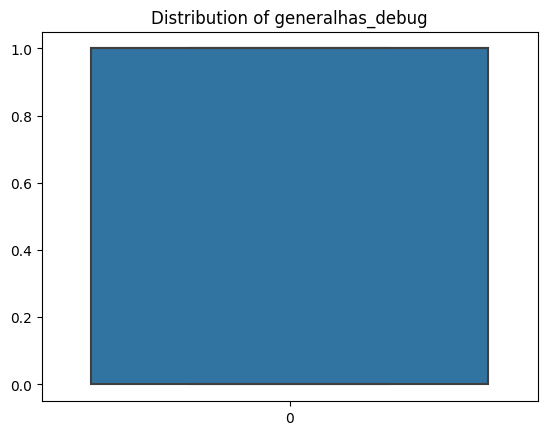

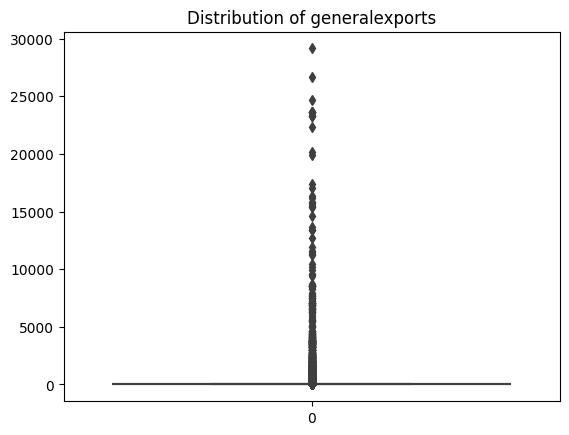

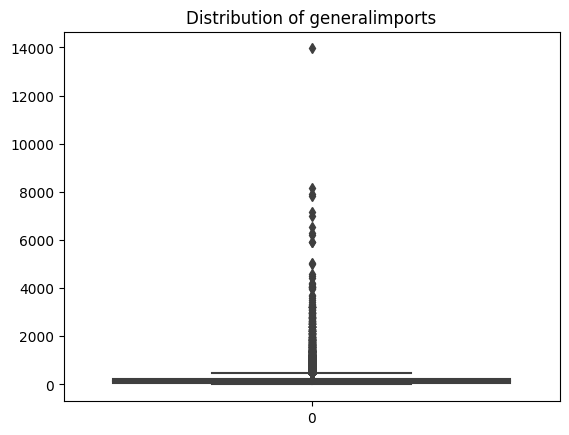

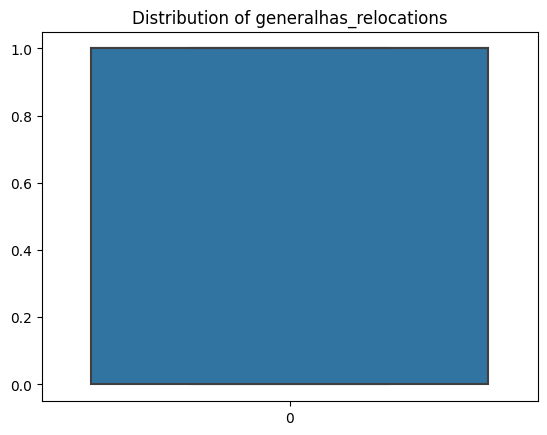

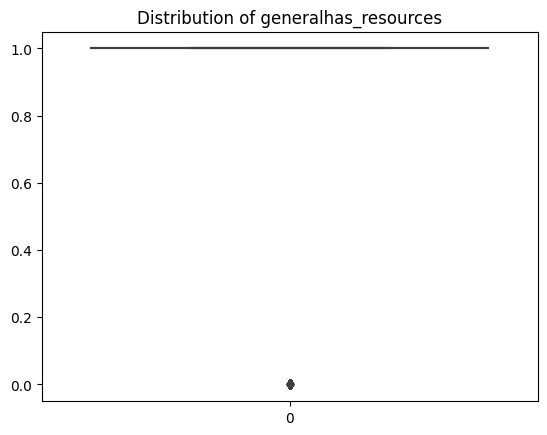

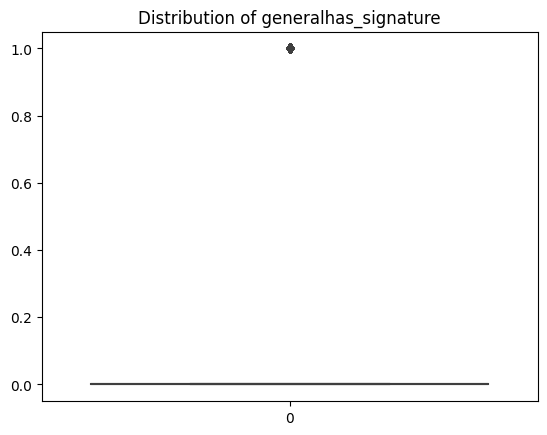

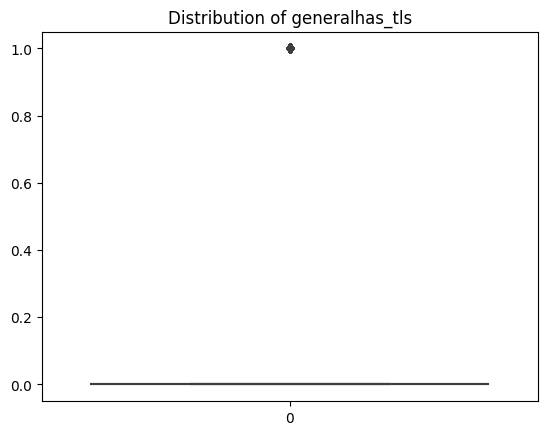

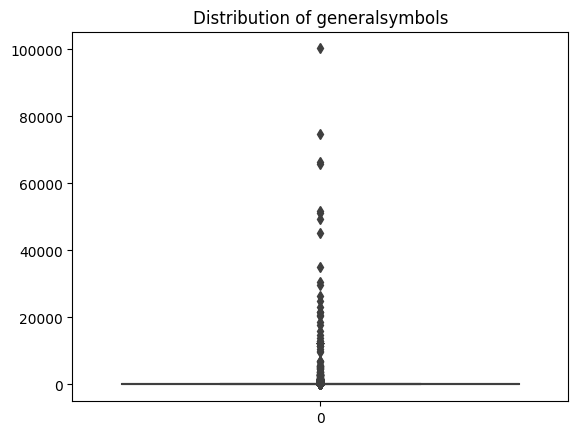

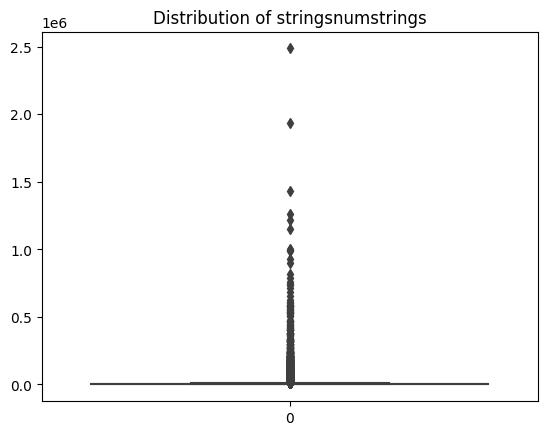

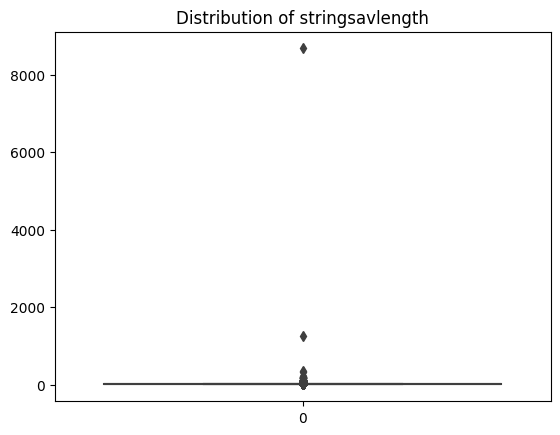

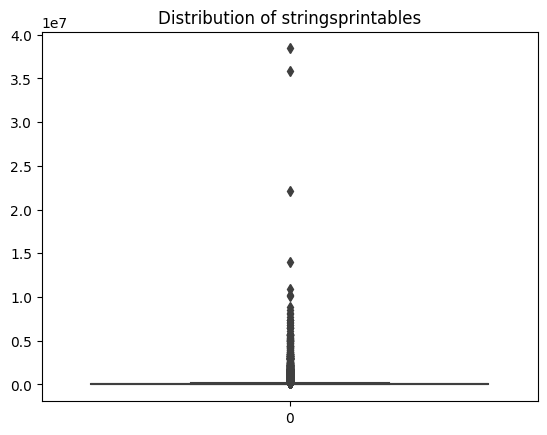

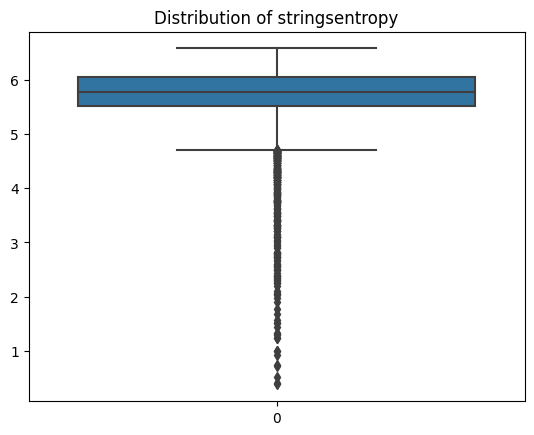

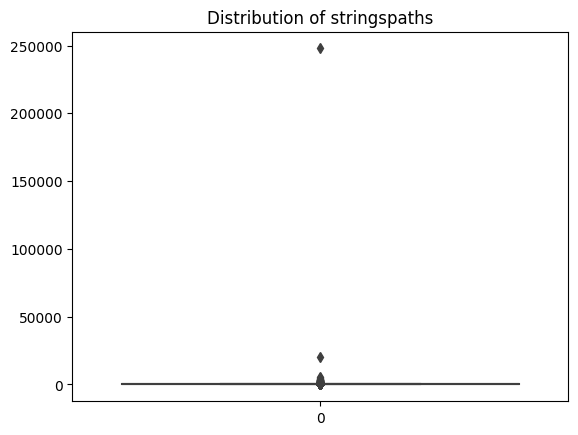

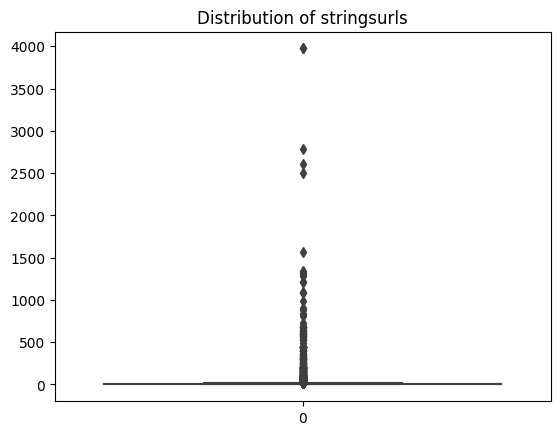

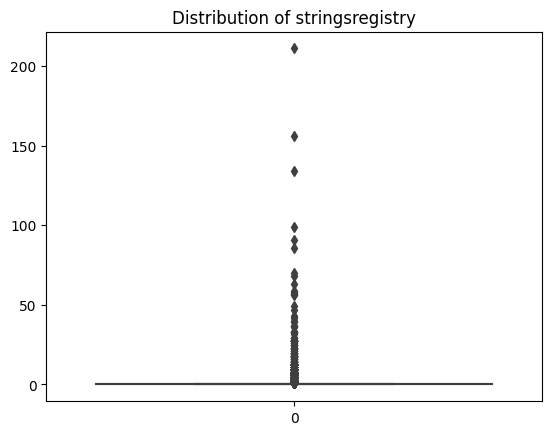

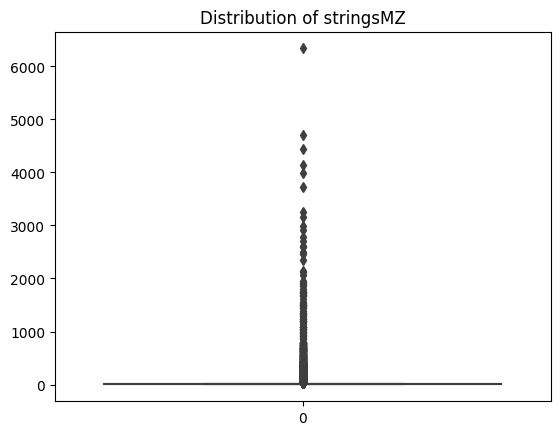

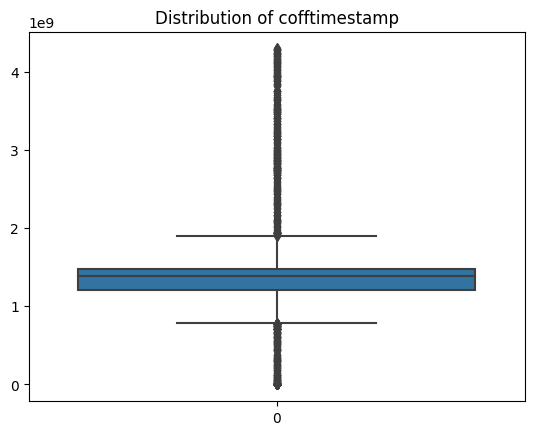

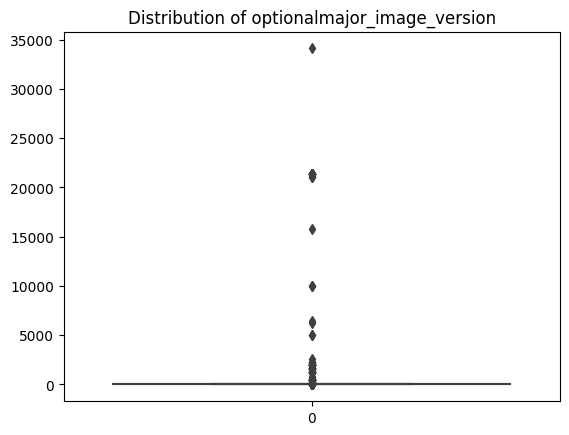

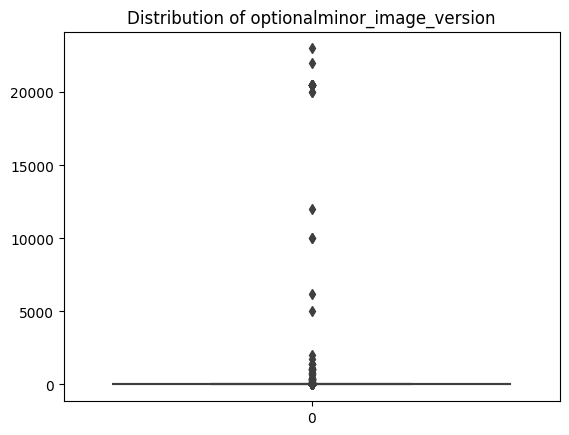

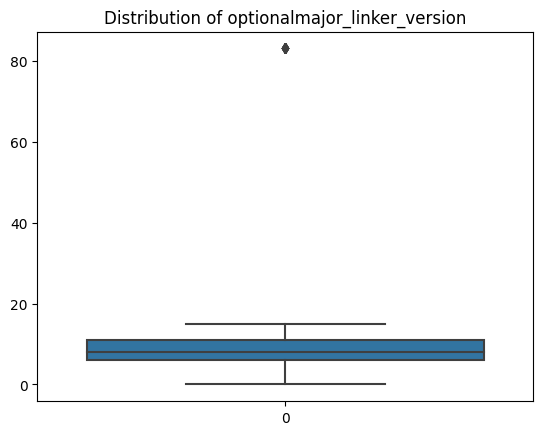

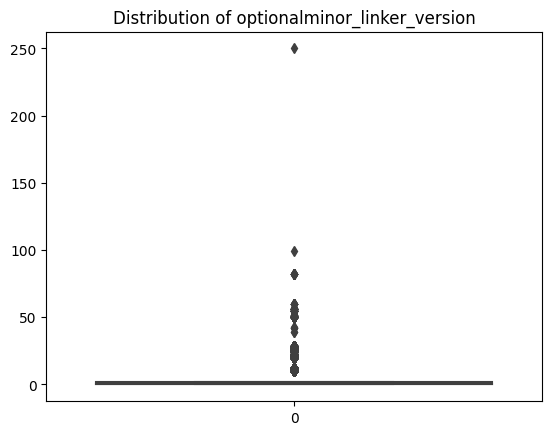

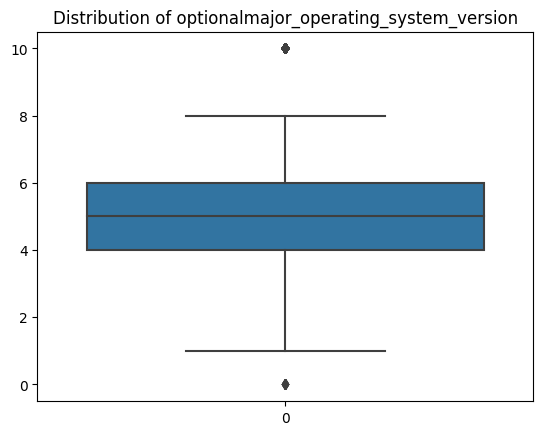

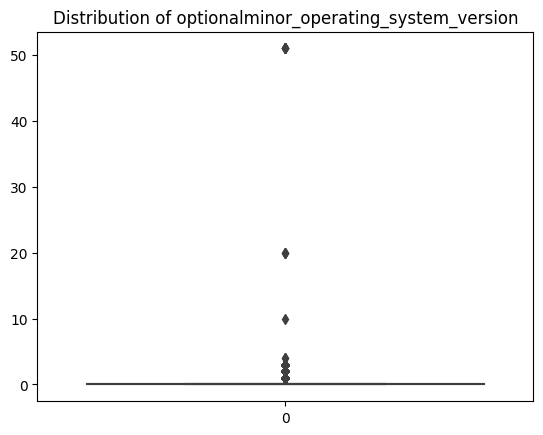

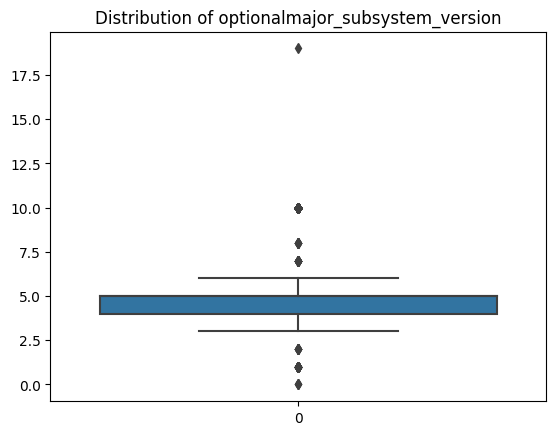

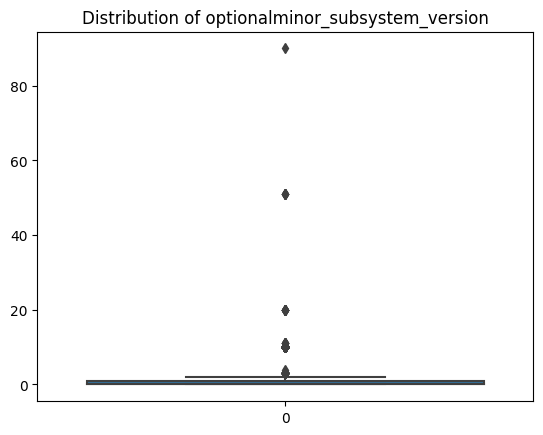

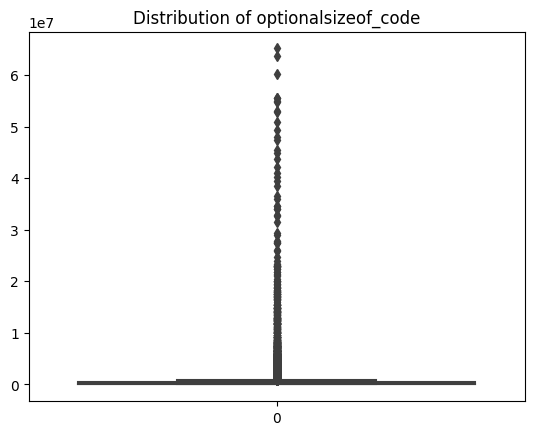

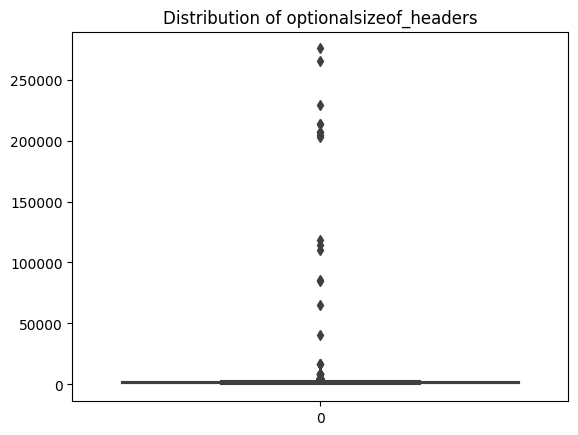

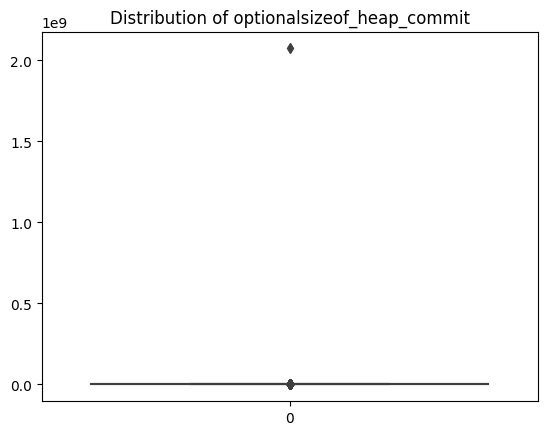

In [20]:


for column in df.columns:
    sns.boxplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.show()

## Standardization

In [21]:
# Columns to exclude from standardization
exclude_columns= [
"machine", "subsystem", "label"
]

df_standardized = df.copy()

scaler = StandardScaler()

for column in df.columns:
    if column not in exclude_columns:
        # Standardize the column
        df_standardized[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

print(df_standardized)

       label  .textsize  .textentropy  .textvsize  .datasize  .dataentropy  \
0          0  -0.247186      0.494509   -0.247829  -0.101155     -0.689683   
1          0  -0.068730      0.971794   -0.070564  -0.083804      1.853422   
2          0  -0.224187      0.374258   -0.225335  -0.093058     -0.776630   
3          0  -0.243992      0.591700   -0.244618  -0.099998      0.653416   
4          0  -0.254639      0.063221   -0.255213  -0.099998      0.572809   
...      ...        ...           ...         ...        ...           ...   
21162      0   0.077996      0.467967    0.075161  -0.059513      1.301463   
21163      0  -0.248464     -0.279662   -0.249085  -0.099998      0.371479   
21164      0  -0.258260    -10.232667   -0.211557  -0.102312     -1.682705   
21165      0  -0.254213      0.028311   -0.254651  -0.095371      0.394214   
21166      0  -0.254639     -0.450191   -0.255092  -0.098841     -0.522790   

       .datavsize  .rsrcsize  .rsrcentropy  .rsrcvsize  ...  \


## Saving to csv 

In [22]:
df_standardized.to_csv('ember_data.csv',index= False)
df.to_csv('ember_data_unfiltered.csv',index= False)

# Load from CSV

In [24]:
#load from csv to df
df = pd.read_csv('ember_data_unfiltered.csv')
df_standardized = pd.read_csv('ember_data.csv')


In [35]:
len(df_standardized.index)
#downsample the df to 10000 rows


21167

In [11]:
y = df_standardized['label']

X = df_standardized.drop('label', axis=1)


In [12]:
# Get the count of each unique value
value_counts = y.value_counts()

# Retrieve the count of the specific value
c1 = value_counts.get(1, 0)
c2 = value_counts.get(0, 0)

# Print the result
print("Count of", 1, "in column:", c1, c2)


Count of 1 in column: 53695 59011


In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# X_train.shape, y_train.shape
y_train.value_counts()

label
0    47127
1    43037
Name: count, dtype: int64

# Random Forest Classifier  

In [9]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomForestClassifier(criterion='entropy', n_jobs=2, random_state=42,
                       verbose=1, warm_start=True)

In [10]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9295


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


# Model 1

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4200      
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

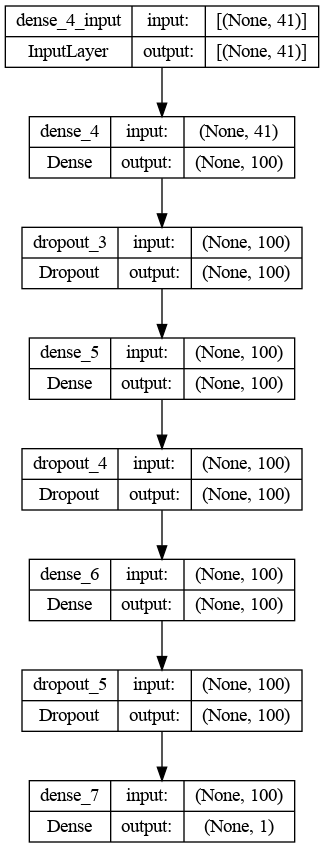

In [25]:
# write a ann model to classify 


def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=41, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model
  
# def get_model2():
#     model = Sequential()
#     model.add(Dense(100, input_dim=2381, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#     model.add(Dropout(0.5))
#     model.add(Dense(2, activation='softmax'))
#     return model
  
model = get_model()
# model2 = get_model2()

print(model.summary())
tf.keras.utils.plot_model(model, show_shapes=True)






# Compile and Test


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#validation accuracy chart



history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_test, y_test), verbose=1)



Epoch 1/50
63/63 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.8306 - val_loss: 0.4182 - val_accuracy: 0.8585
Epoch 2/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4650 - accuracy: 0.8326 - val_loss: 0.4235 - val_accuracy: 0.8595
Epoch 3/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8354 - val_loss: 0.4268 - val_accuracy: 0.8650
Epoch 4/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8393 - val_loss: 0.4226 - val_accuracy: 0.8605
Epoch 5/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.8409 - val_loss: 0.4237 - val_accuracy: 0.8530
Epoch 6/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4589 - accuracy: 0.8339 - val_loss: 0.4156 - val_accuracy: 0.8650
Epoch 7/50
63/63 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.8374 - val_loss: 0.4246 - val_accuracy: 0.8560
Epoch 8/50
63/63 [==

In [27]:

# save model
model.save('model/ember_model.h5')

In [28]:
# predit
y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)
# y_test = np.argmax(y_test, axis=1)

# accuracy
# print(accuracy_score(y_test, y_pred))


63/63 [==============================] - 0s 796us/step


In [29]:
# zer=0
# for x in y_pred:
#     if x==0:
#         zer+=1
# print(zer)
# print(len(y_pred))

# rounded = [inyt(round(x[0])) for x in predictions]
# print(rounded)
y_pred_read = [int(round(x[0])) for x in y_pred]
y_pred_read = np.array(y_pred_read)
# y_pred_read.value_counts()
#give unique values with count in y_pred_read
unique, counts = np.unique(y_pred_read, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1080]
 [   1  920]]


In [30]:
y_test.value_counts()

label
0    1101
1     899
Name: count, dtype: int64

In [31]:
y_test.shape, y_pred.shape,y_pred_read.shape

((2000,), (2000, 1), (2000,))

In [32]:
# find accuracy of the model
accuracy_score(y_test, y_pred_read)

0.8505

In [18]:
# confusion matrix



def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
  
plot_confusion_matrix(y_test, y_pred_read, labels=[0, 1], title='Confusion matrix')

NameError: name 'y_pred_read' is not defined

# Default Validation

In [39]:
print(type (model.history.history))

<class 'dict'>


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


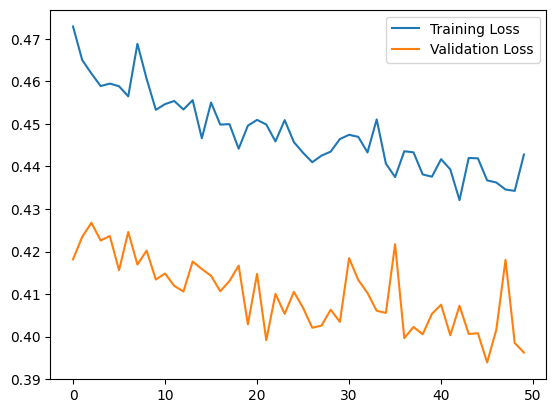

In [41]:

#get training loss
print(history.history.keys())
train_loss = history.history['loss']
#get validation loss
val_loss = history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


In [37]:

#get training loss
print(model.history.history.keys())
train_loss = model.history.history['loss']
#get validation loss
val_loss = model.history.history['val_loss']
#plot graph

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()


KeyError: 'loss'

# Testing Ensemble

In [77]:
# %pip install xgboost
%pip install scikeras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [89]:
# write xgboost model using above ann model

def get_model():
    model = Sequential()
    # X_train.shape = (90164, 41)
    model.add(Dense(100, input_dim=41, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# keras Resgresor

# use Sci-keras to wrap keras model
model= KerasClassifier(build_fn=get_model, epochs=50, batch_size=128, verbose=1)

# now use this model as an estimator in sklearn pipeline
ada_model = AdaBoostClassifier(estimator=model, n_estimators=10, random_state=42)

# now we will use xgboost model as an estimator in sklearn pipeline


# create pipeline
# pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', ada_model)])




In [90]:

# fit pipeline
# pipeline.fit(X_train, y_train)

ada_model.fit(X_train, y_train)




/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:26:51.782248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype float and shape [90164]
	 [[{{node Placeholder/_12}}]]
2023-08-27 18:26:51.782604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.0422e-06 - accuracy: 0.6362
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 5.6983e-06 - accuracy: 0.7675
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 4.9058e-06 - accuracy: 0.8089
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 4.4433e-06 - accuracy: 0.8261
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 4.1938e-06 - accuracy: 0.8363
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 4.0232e-06 - accuracy: 0.8419
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 3.8880e-06 - accuracy: 0.8469
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 3.7991e-06 - accuracy: 0.8495
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 3.7198e-06 - accuracy: 0.8530
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:27:58.008608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:27:58.008917: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 871us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:28:12.555975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:28:12.556302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8540e-06 - accuracy: 0.5140
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7035e-06 - accuracy: 0.5260
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6782e-06 - accuracy: 0.5349
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6612e-06 - accuracy: 0.5466
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6524e-06 - accuracy: 0.5544
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6259e-06 - accuracy: 0.5731
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6327e-06 - accuracy: 0.5737
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6224e-06 - accuracy: 0.5920
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6147e-06 - accuracy: 0.5989
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:29:18.929075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:29:18.929322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 836us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:29:33.081133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:29:33.081474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8872e-06 - accuracy: 0.4987
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7391e-06 - accuracy: 0.5083
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7186e-06 - accuracy: 0.5012
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6977e-06 - accuracy: 0.5118
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6973e-06 - accuracy: 0.5064
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6950e-06 - accuracy: 0.5145
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6987e-06 - accuracy: 0.5120
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6892e-06 - accuracy: 0.5090
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6932e-06 - accuracy: 0.4929
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:30:46.866529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:30:46.866794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 857us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:31:01.156990: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:31:01.157294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8448e-06 - accuracy: 0.5057
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7330e-06 - accuracy: 0.5074
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7043e-06 - accuracy: 0.5055
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6977e-06 - accuracy: 0.5110
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7025e-06 - accuracy: 0.5130
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6857e-06 - accuracy: 0.5193
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6864e-06 - accuracy: 0.5164
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6798e-06 - accuracy: 0.5193
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6781e-06 - accuracy: 0.5166
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:32:12.915839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:32:12.916122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 872us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:32:27.189963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]
2023-08-27 18:32:27.190288: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype float and shape [90164]
	 [[{{node Placeholder/_12}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8494e-06 - accuracy: 0.4954
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7312e-06 - accuracy: 0.5023
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7228e-06 - accuracy: 0.4978
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7064e-06 - accuracy: 0.5089
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6985e-06 - accuracy: 0.5119
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6966e-06 - accuracy: 0.5010
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7000e-06 - accuracy: 0.4939
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6993e-06 - accuracy: 0.5050
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6899e-06 - accuracy: 0.4948
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:33:40.587036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:33:40.587331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 829us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:33:55.017702: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype float and shape [90164]
	 [[{{node Placeholder/_12}}]]
2023-08-27 18:33:55.018069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8678e-06 - accuracy: 0.4988
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7526e-06 - accuracy: 0.5002
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7239e-06 - accuracy: 0.4912
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7083e-06 - accuracy: 0.4938
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7084e-06 - accuracy: 0.4880
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7013e-06 - accuracy: 0.4990
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6946e-06 - accuracy: 0.4986
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6975e-06 - accuracy: 0.5012
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6926e-06 - accuracy: 0.5022
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:35:00.169193: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:35:00.169458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 1ms/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:35:15.083530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]
2023-08-27 18:35:15.083900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype float and shape [90164]
	 [[{{node Placeholder/_12}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8202e-06 - accuracy: 0.5070
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7417e-06 - accuracy: 0.5017
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7230e-06 - accuracy: 0.4927
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7128e-06 - accuracy: 0.5026
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7069e-06 - accuracy: 0.5039
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7063e-06 - accuracy: 0.5057
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7105e-06 - accuracy: 0.4980
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6969e-06 - accuracy: 0.5020
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6941e-06 - accuracy: 0.5038
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:36:20.963311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:36:20.963585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 859us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:36:35.777260: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:36:35.777600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8307e-06 - accuracy: 0.5113
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7522e-06 - accuracy: 0.5056
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7115e-06 - accuracy: 0.4979
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7121e-06 - accuracy: 0.4939
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7060e-06 - accuracy: 0.5065
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7005e-06 - accuracy: 0.5105
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6976e-06 - accuracy: 0.5093
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7031e-06 - accuracy: 0.5035
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7016e-06 - accuracy: 0.4934
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:37:47.568563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:37:47.568827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 985us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:38:02.423576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:38:02.423921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 3s 2ms/step - loss: 7.9402e-06 - accuracy: 0.4963
Epoch 2/50
705/705 [==============================] - 2s 2ms/step - loss: 7.7591e-06 - accuracy: 0.5010
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7268e-06 - accuracy: 0.4929
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7190e-06 - accuracy: 0.4993
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7158e-06 - accuracy: 0.4996
Epoch 6/50
705/705 [==============================] - 2s 2ms/step - loss: 7.7002e-06 - accuracy: 0.5066
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6983e-06 - accuracy: 0.5119
Epoch 8/50
705/705 [==============================] - 2s 2ms/step - loss: 7.7036e-06 - accuracy: 0.5083
Epoch 9/50
705/705 [==============================] - 2s 2ms/step - loss: 7.6949e-06 - accuracy: 0.5156
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:39:14.605376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:39:14.605634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 901us/step


/home/vishnusai/.local/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/50


2023-08-27 18:39:29.454183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype float and shape [90164]
	 [[{{node Placeholder/_12}}]]
2023-08-27 18:39:29.454514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_11' with dtype float and shape [90164,1]
	 [[{{node Placeholder/_11}}]]


705/705 [==============================] - 2s 2ms/step - loss: 7.8306e-06 - accuracy: 0.4960
Epoch 2/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7367e-06 - accuracy: 0.4963
Epoch 3/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7188e-06 - accuracy: 0.5049
Epoch 4/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7357e-06 - accuracy: 0.4972
Epoch 5/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7072e-06 - accuracy: 0.5116
Epoch 6/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7015e-06 - accuracy: 0.5100
Epoch 7/50
705/705 [==============================] - 1s 2ms/step - loss: 7.7032e-06 - accuracy: 0.5163
Epoch 8/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6945e-06 - accuracy: 0.5066
Epoch 9/50
705/705 [==============================] - 1s 2ms/step - loss: 7.6966e-06 - accuracy: 0.5127
Epoch 10/50
705/705 [==============================] - 1s 2ms/step - loss: 

2023-08-27 18:40:36.451725: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:40:36.451995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [90164,41]
	 [[{{node Placeholder/_10}}]]


705/705 [==============================] - 1s 892us/step


AdaBoostClassifier(estimator=KerasClassifier(batch_size=128, build_fn=<function get_model at 0x7fb96858c550>, epochs=50),
                   n_estimators=10, random_state=42)

In [91]:
# predict
# y_pred = pipeline.predict(X_test)
y_pred = ada_model.predict(X_test)



151/177 [========================>.....] - ETA: 0s

2023-08-27 18:41:12.726877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:12.727187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


177/177 [==============================] - 0s 880us/step


2023-08-27 18:41:13.062000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:13.062278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


177/177 [==============================] - 0s 916us/step


2023-08-27 18:41:13.328532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:13.328830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


177/177 [==============================] - 0s 932us/step


2023-08-27 18:41:13.602211: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:13.602501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


165/177 [==========================>...] - ETA: 0s

2023-08-27 18:41:13.883557: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:13.883904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


177/177 [==============================] - 0s 859us/step


2023-08-27 18:41:14.161695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:14.161952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


152/177 [========================>.....] - ETA: 0s

2023-08-27 18:41:14.426777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:14.427056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


177/177 [==============================] - 0s 935us/step


2023-08-27 18:41:14.724068: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:14.724332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


177/177 [==============================] - 0s 942us/step


2023-08-27 18:41:15.008868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:15.009150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


177/177 [==============================] - 0s 909us/step


2023-08-27 18:41:15.284546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]
2023-08-27 18:41:15.284857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype float and shape [22542,41]
	 [[{{node Placeholder/_10}}]]


# Confusion Matrix


0.9010735515925827


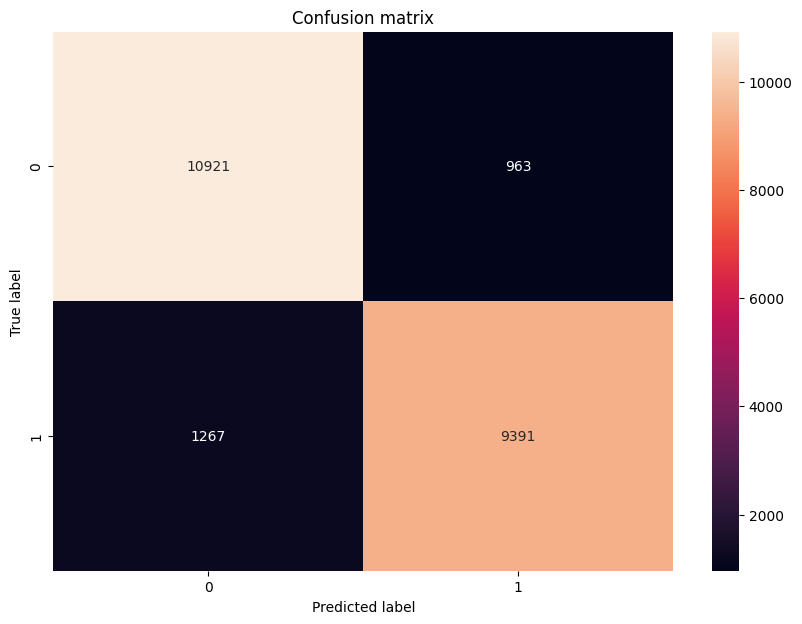

In [97]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
# accuracy
print(accuracy_score(y_test, y_pred.round()))

# confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), labels=[0, 1], title='Confusion matrix')



# Learning curves

In [96]:
#print the learning curve for ada_model
train_sizes, train_scores, test_scores = learning_curve(ada_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1,n_iter=10)


plt.plot(train_sizes,np.mean(train_scores,axis=1))


TypeError: learning_curve() got an unexpected keyword argument 'n_iter'

# K Fold Validation